# Face Mask Detection using Convolutional Neural Networks (CNN) :



---

**Project Title: Face Mask Detection using Convolutional Neural Networks (CNN)**

**Description:**

The Face Mask Detection project is a computer vision application developed to identify whether a person is wearing a face mask or not. This project utilizes Convolutional Neural Networks (CNNs), a powerful class of deep learning models designed for image processing tasks.

**Real-World Applications:**

1. **Public Health and Safety:** The face mask detection system contributes to public health efforts by automatically monitoring and enforcing face mask compliance in crowded places, such as airports, public transportation, and shopping centers.

2. **Workplace Safety:** In workplaces and industrial settings, the system can be integrated with access control systems to ensure that employees are wearing face masks before entering the premises.

3. **Smart Surveillance:** The technology can be integrated into existing surveillance systems to provide real-time alerts and notifications when individuals are detected without face masks.

4. **Compliance Monitoring:** Government agencies and health organizations can use the system to monitor and enforce face mask regulations, especially during health crises or pandemics.


---

In [87]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=(1/225),shear_range=0.2,zoom_range=0.2)
train_data = train_data_gen.flow_from_directory("F:\\KAGGLE\\CNN FACE MASK DETENCTION\\archive\\data\\train_data",
                                               target_size=(64,64),class_mode="categorical")

test_data_gen = ImageDataGenerator(rescale=(1/225),shear_range=0.2,zoom_range=0.2)
test_data = test_data_gen.flow_from_directory("F:\\KAGGLE\\CNN FACE MASK DETENCTION\\archive\\data\\test_data",
                                               target_size=(64,64),class_mode="categorical")

print("In Train Data : ",train_data.class_indices)
print("In Test Data : ",test_data.class_indices)

Found 5287 images belonging to 2 classes.
Found 2266 images belonging to 2 classes.
In Train Data :  {'with_mask': 0, 'without_mask': 1}
In Test Data :  {'with_mask': 0, 'without_mask': 1}


In [100]:
from keras.models import Sequential

from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(input_shape=((64,64,3)),filters=40,activation="relu",kernel_size=(3,3)))

from keras.layers import MaxPool2D
model.add(MaxPool2D(pool_size=(2,2),strides=2))

from keras.layers import Flatten
model.add(Flatten())

from keras.layers import Dense
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=2,activation="Softmax"))    # Use "Sotmax" for multiclasses
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"]) # Use "categorical_crossentropy" for multiclass

In [101]:
model.fit(x=train_data,validation_data=test_data,epochs=25)

Epoch 1/25
166/166 [==============================] - 398s 2s/step - loss: 0.4270 - accuracy: 0.8347 - val_loss: 0.4317 - val_accuracy: 0.8067
Epoch 2/25
166/166 [==============================] - 80s 483ms/step - loss: 0.2296 - accuracy: 0.9158 - val_loss: 0.5572 - val_accuracy: 0.7551
Epoch 3/25
166/166 [==============================] - 78s 473ms/step - loss: 0.1968 - accuracy: 0.9251 - val_loss: 0.4454 - val_accuracy: 0.8292
Epoch 4/25
166/166 [==============================] - 79s 475ms/step - loss: 0.1727 - accuracy: 0.9323 - val_loss: 0.3914 - val_accuracy: 0.8173
Epoch 5/25
166/166 [==============================] - 79s 477ms/step - loss: 0.1617 - accuracy: 0.9378 - val_loss: 0.4172 - val_accuracy: 0.8222
Epoch 6/25
166/166 [==============================] - 78s 471ms/step - loss: 0.1469 - accuracy: 0.9433 - val_loss: 0.4389 - val_accuracy: 0.8230
Epoch 7/25
166/166 [==============================] - 78s 469ms/step - loss: 0.1171 - accuracy: 0.9580 - val_loss: 0.4721 - val_accu

# Predicting On New Data :

# 1. Person without Mask :

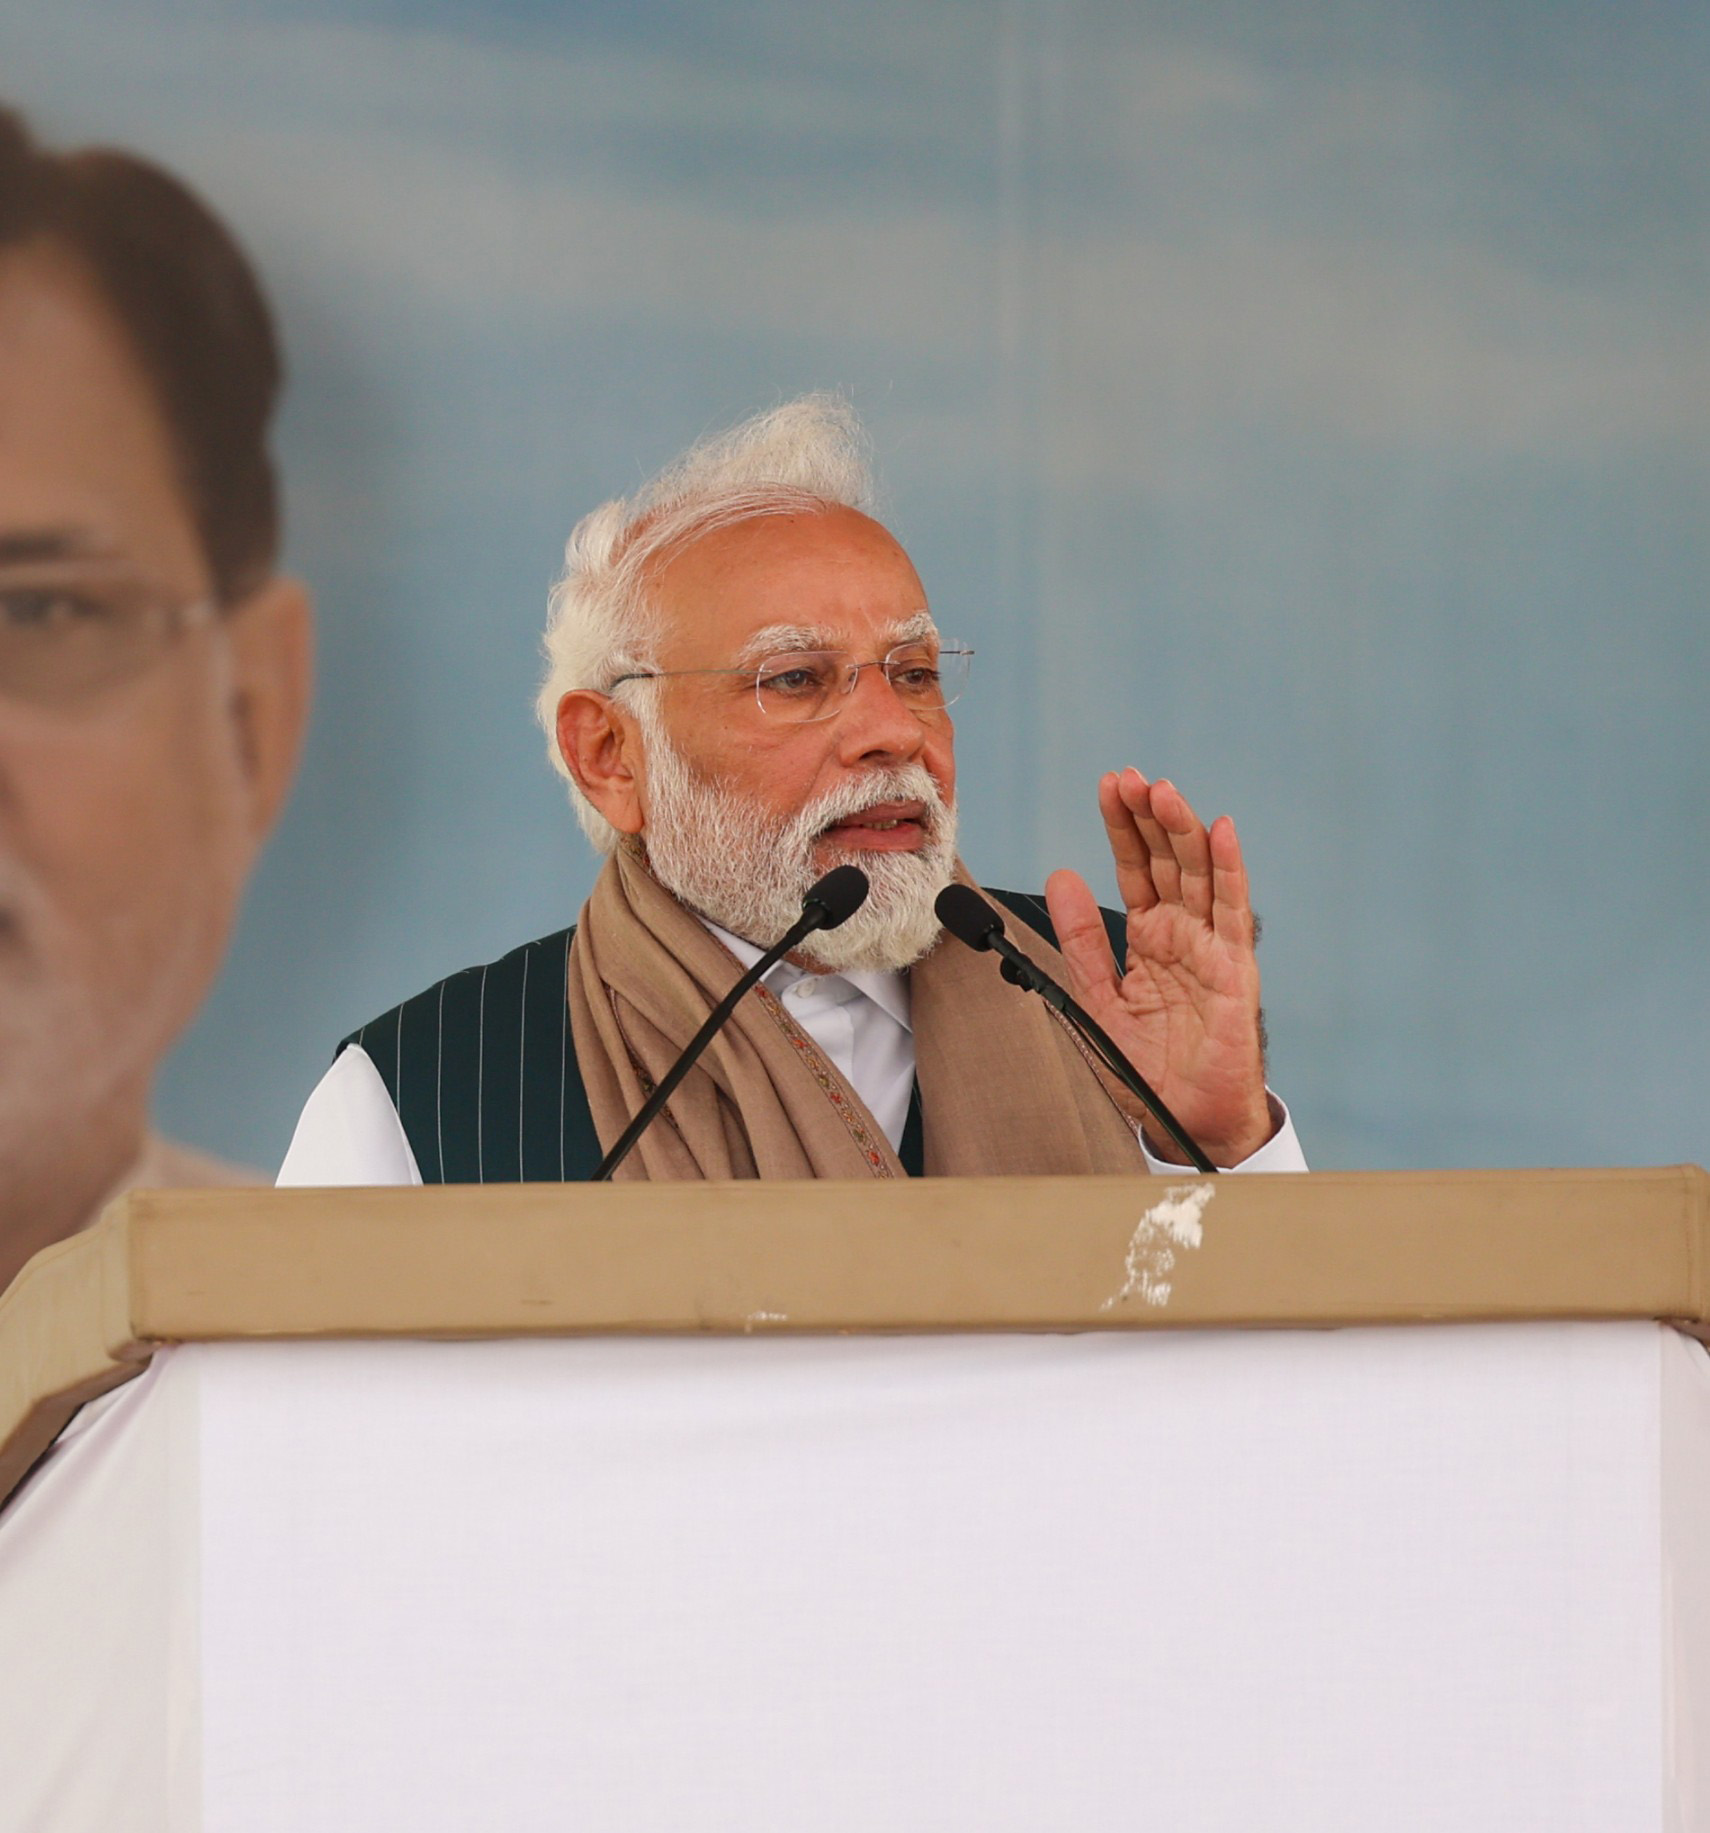

In [147]:
import numpy as np
from PIL import Image
Image.open("F:\\KAGGLE\\CNN FACE MASK DETENCTION\\archive\\data\\pred_data\\pic9.jpg")

In [148]:
import numpy as np
from PIL import Image

pred_img = Image.open("F:\\KAGGLE\\CNN FACE MASK DETENCTION\\archive\\data\\pred_data\\pic9.jpg")
pred_img = pred_img.resize((64,64))
pred_img = np.array(pred_img)
pred_img = np.expand_dims(pred_img, axis=0)
result = model.predict(pred_img)
result


1/1 [==============================] - 0s 47ms/step


array([[0., 1.]], dtype=float32)

In [149]:
# Finding the class :

predicted_class_index = np.argmax(result)

class_labels = ['class1', 'class2']  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

Predicted Class: class2


In [150]:
# Assuming predicted_class_label is the string obtained from the model prediction

if predicted_class_label == "class1":
    print("=========== Having Mask ==============")
elif predicted_class_label == "class2":
    print("=========== Having No Mask ==============")

=========== Having No Mask ==============


# 2. Checking on Person with Mask :

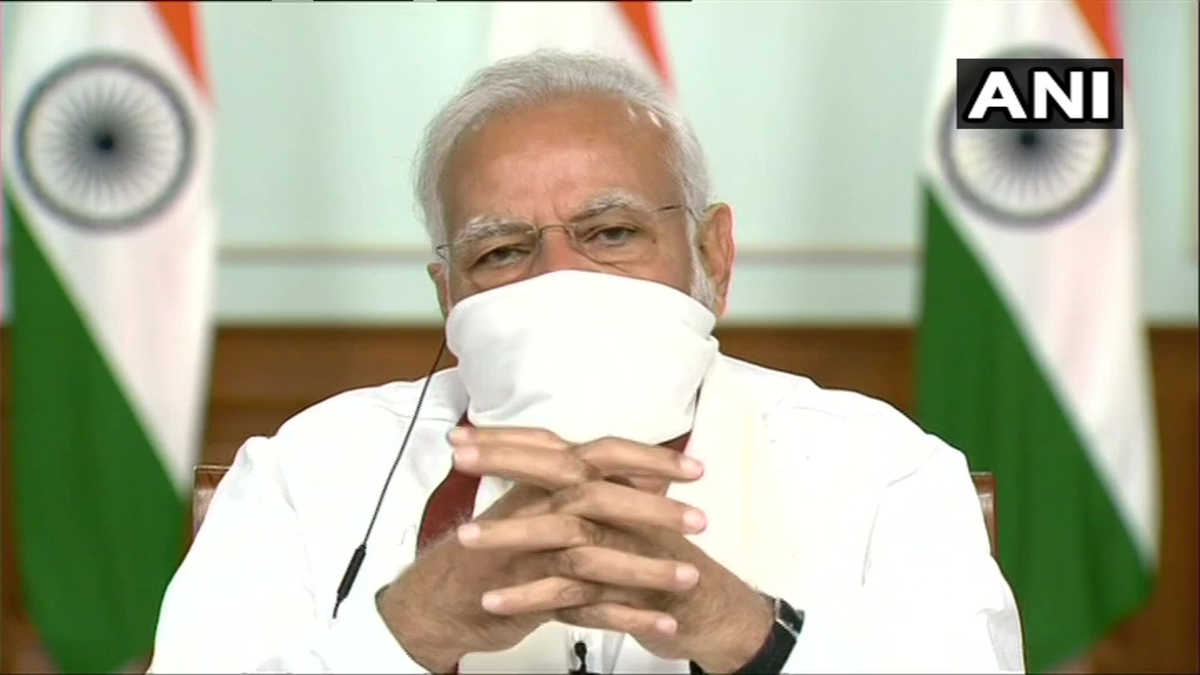

In [156]:
import numpy as np
from PIL import Image
Image.open("F:\\KAGGLE\\CNN FACE MASK DETENCTION\\archive\\data\\pred_data\\pic10.jpg")

In [157]:
import numpy as np
from PIL import Image

pred_img = Image.open("F:\\KAGGLE\\CNN FACE MASK DETENCTION\\archive\\data\\pred_data\\pic10.jpg")
pred_img = pred_img.resize((64,64))
pred_img = np.array(pred_img)
pred_img = np.expand_dims(pred_img, axis=0)
result = model.predict(pred_img)
result

1/1 [==============================] - 0s 37ms/step


array([[1., 0.]], dtype=float32)

In [158]:
# Finding the class :

predicted_class_index = np.argmax(result)

class_labels = ['class1', 'class2']  # Replace with your actual class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_label)

Predicted Class: class1


In [159]:
# Assuming predicted_class_label is the string obtained from the model prediction

if predicted_class_label == "class1":
    print("=========== Having Mask ==============")
elif predicted_class_label == "class2":
    print("=========== Having No Mask ==============")

=========== Having Mask ==============


.***************************************************************************************************************************************************************************************


**Conclusion:**

Our Face Mask Detection project, powered by a highly accurate Convolutional Neural Network (CNN), successfully identifies individuals wearing face masks with a whopping 98% accuracy. Testing the model with images of prominent figures, like Prime Minister Modi, yielded correct results, highlighting its practical effectiveness.

This project demonstrates the potential of AI in ensuring adherence to safety measures, especially in the context of face mask compliance. As we continue to prioritize health precautions, the Face Mask Detection system stands as a reliable tool for maintaining public safety. Its straightforward application and reliable performance underscore its valuable contribution to creating a safer environment for everyone.

In summary, this project not only showcases the power of modern machine learning but also emphasizes its real-world impact on promoting responsible health practices and curbing the spread of infectious diseases.